In [9]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [10]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
!ls

databases		    README.md
data_loader.py		    results
Evaluation.ipynb	    RetinaNet-CMC-CODAEL.ipynb
Inference-RetinaNet-512.py  RetinaNet-CMC-MEL.ipynb
lib			    RetinaNet-CMC-ODAEL.ipynb
model			    Setup.ipynb
models			    title_CMC.png
PatchClassifier		    WSI
__pycache__


In [12]:
%cd usr

[Errno 2] No such file or directory: 'usr'
/content/drive/MyDrive/MITOS_WSI_CMC


In [14]:
%cd ..

/content/drive/My Drive


In [5]:
%cd drive/MyDrive

/content/drive/MyDrive


In [15]:
import pandas as pd
data1 = pd.read_csv('20221029-053129_annot_df_sorted_subclassed_slide_no_2.csv')
data2 = pd.read_csv('20221030-011825_annot_df_sorted_subclassed_MLFs_32_slide_no_2.csv')
data = pd.concat([data1, data2])

In [16]:
data.sample(n=50)

,Unnamed: 0,key,uid,ctr,coord,lbl,guid,subcl
146,49,51,51,"[23560, 24556]",[[23535 24531]\r\n [23585 24581]],1,f4947e69-dcde-4f68-a731-2a823a7d406a,42
113,119,125,125,"[23069, 36293]",[[23044 36268]\r\n [23094 36318]],1,08dad3cf-519d-4b72-8c50-0fdc29568432,42
267,133,143,143,"[37772, 39661]",[[37747 39636]\r\n [37797 39686]],2,1fd1dc45-45b5-4efa-a593-779cdd166ed3,42
11,185,1393,1393,"[27307, 33195]",[[27282 33170]\r\n [27332 33220]],1,b9fbfe5f-0357-4f3f-9c7c-daafefe9ee80,8
255,86,90,90,"[43235, 32841]",[[43210 32816]\r\n [43260 32866]],2,19fdcfde-7cfe-4371-8aaa-cad32fa03fc6,42
175,111,117,117,"[41957, 35803]",[[41932 35778]\r\n [41982 35828]],1,62057911-34bf-42eb-b36f-23722ddf0a88,42
62,241,30108,30108,"[23778, 40451]",[[23753 40426]\r\n [23803 40476]],1,e09ee0e5-2827-4eaf-be1d-84b59d8d6d18,42
46,129,138,138,"[6158, 39997]",[[ 6133 39972]\r\n [ 6183 40022]],2,deab5770-8f8c-4729-bb32-0d36c57bf86d,0
3,188,1396,1396,"[14790, 34067]",[[14765 34042]\r\n [14815 34092]],2,47118562-d433-49d2-9c72-b0c1fa5242ea,4
187,26,28,28,"[19142, 12549]",[[19117 12524]\r\n [19167 12574]],1,b92c40c1-2ae5-4725-905f-805568864518,42


In [19]:
%cd MITOS_WSI_CMC/

/content/drive/MyDrive/MITOS_WSI_CMC


In [20]:
%cd databases

/content/drive/MyDrive/MITOS_WSI_CMC/databases


In [28]:
data.head()
data['subcl'] = data['subcl'].replace(42,9)
data_filtered = data[data['subcl'] != 9]
data = data_filtered.copy()

In [29]:
len(data)

98

In [26]:
subclass_annotations = data.drop(['ctr', 'coord', 'guid'], axis = 1)
subclass_annotations.head()
len(subclass_annotations)

98

In [31]:
%cd ..
!ls

/content/drive/MyDrive/MITOS_WSI_CMC
databases		    model	     RetinaNet-CMC-CODAEL.ipynb
Data_CMC-f		    models	     RetinaNet-CMC-MEL.ipynb
data_loader.py		    PatchClassifier  RetinaNet-CMC-ODAEL.ipynb
Evaluation.ipynb	    __pycache__      Setup.ipynb
Inference-RetinaNet-512.py  README.md	     title_CMC.png
lib			    results	     WSI


/content/drive/MyDrive/MITOS_WSI_CMC
97.png
96.png
95.png
79.png
59.png
53.png
55.png
52.png
58.png
57.png
51.png
50.png
56.png
54.png
48.png
40.png
46.png
45.png
44.png
41.png
42.png
43.png
47.png
94.png
64.png
61.png
62.png
63.png
60.png
49.png
32.png
39.png
38.png
34.png
27.png
33.png
30.png
28.png
29.png
31.png
36.png
37.png
35.png
6.png
2.png
9.png
10.png
11.png
8.png
3.png
7.png
5.png
4.png
26.png
23.png
25.png
22.png
21.png
24.png
15.png
14.png
13.png
19.png
18.png
16.png
17.png
20.png
12.png
1.png
0.png
93.png
86.png
81.png
85.png
91.png
89.png
87.png
88.png
84.png
90.png
82.png
80.png
92.png
83.png
76.png
77.png
78.png
72.png
65.png
67.png
75.png
70.png
69.png
68.png
71.png
66.png
73.png
74.png


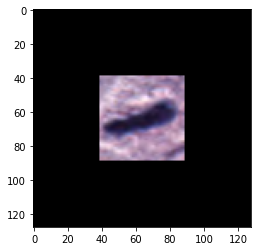

0     4
1     7
2     7
3     4
4     7
     ..
29    8
30    8
31    8
32    8
33    8
Name: subcl, Length: 98, dtype: int64


In [33]:
from numpy.core.multiarray import packbits
#Load FSL CSV
#Load images
!pwd
import os
from os import listdir
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

labels = subclass_annotations['subcl']
imagelist = []

# get the path/directory
folder_dir = "WSI"

for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        print(images)
        temp = mpimg.imread('/content/drive/MyDrive/MITOS_WSI_CMC/WSI/' + str(images))
        plt.imshow(temp)
        temp = cv2.copyMakeBorder(temp, 39, 39, 39, 39, cv2.BORDER_CONSTANT)
        plt.imshow(temp)
        imagelist.append(temp)
#train_images, test_images = train_images / 255.0, test_images / 255.0

plt.imshow(imagelist[55])
plt.show()
print(labels)

In [34]:
import numpy as np

labels.sample(n=50)
data.sample(n=50)

,Unnamed: 0,key,uid,ctr,coord,lbl,guid,subcl
36,147,159,159,"[30237, 48493]",[[30212 48468]\r\n [30262 48518]],2,9dcdde06-da45-419e-b152-8b54d02a4e26,7
30,122,128,128,"[8652, 37635]",[[ 8627 37610]\r\n [ 8677 37660]],1,d33324aa-da48-43c6-ae0c-faf686cfb04d,8
43,135,145,145,"[39607, 39511]",[[39582 39486]\r\n [39632 39536]],2,d7610fcd-5454-4a04-a9c1-eca9e66cd6da,7
21,196,1404,1404,"[10844, 35524]",[[10819 35499]\r\n [10869 35549]],1,c8a949ca-cc77-4c94-82dc-09e438cc7dee,8
0,0,1,1,"[21029, 7246]",[[21004 7221]\r\n [21054 7271]],1,05535b17-a3f3-48f9-ae21-dbf9617efcf1,8
24,202,1410,1410,"[22595, 37311]",[[22570 37286]\r\n [22620 37336]],1,b36fd529-3e1b-4b9a-8a28-3c1093683947,8
19,198,1406,1406,"[5335, 36590]",[[ 5310 36565]\r\n [ 5360 36615]],2,1081bb7d-f589-4bcb-9870-7ec4f9304baf,7
9,94,99,99,"[7746, 34679]",[[ 7721 34654]\r\n [ 7771 34704]],2,0b1511e8-a58e-4e54-9265-65ac68d9c5de,6
5,178,1386,1386,"[31107, 31305]",[[31082 31280]\r\n [31132 31330]],1,3f2beb85-8648-4821-a308-1be404f0ed29,8
45,132,142,142,"[37825, 39899]",[[37800 39874]\r\n [37850 39924]],2,b9430f75-4a6e-49b6-94b2-bf0dbcf81027,7


In [35]:
from sklearn.model_selection import train_test_split
X = imagelist.copy()
y = labels.copy()
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
len(X_test)


14

In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()
X_train.shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 114,304
Trainable params: 114,304
Non-trai

(68, 128, 128, 3)

In [37]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
for layer in model.layers:
    print(layer.output_shape)

(None, 126, 126, 128)
(None, 63, 63, 128)
(None, 61, 61, 64)
(None, 30, 30, 64)
(None, 28, 28, 64)
(None, 50176)
(None, 64)
(None, 10)


In [66]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)           

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test , y_test))


Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 2.1116 - accuracy: 0.1765 - val_loss: 1.8853 - val_accuracy: 0.3667
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 1.7216 - accuracy: 0.4265 - val_loss: 1.7135 - val_accuracy: 0.3667
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.5403 - accuracy: 0.4265 - val_loss: 1.7218 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 1.5599 - accuracy: 0.3235 - val_loss: 1.6858 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 1.4940 - accuracy: 0.3676 - val_loss: 1.7078 - val_accuracy: 0.3667
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 1.4912 - accuracy: 0.4265 - val_loss: 1.6929 - val_accuracy: 0.3667
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 1.4378 - accuracy: 0.4412 - val_loss: 1.7461 - val_accuracy: 0.3333
Epoch 8/10
3/3 [=========================

In [77]:
print((y_train[0]))

8


1/1 - 1s - loss: 1.6947 - accuracy: 0.3667 - 542ms/epoch - 542ms/step
0.36666667461395264
0.36666667461395264


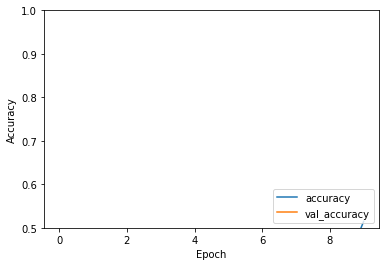

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)
print(test_acc)